## Data Call

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from scipy.stats import t

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, balanced_accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler

import random
import time

# Modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import plot_tree


In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
df = pd.read_csv('/content/drive/MyDrive/다변량분석/homework3/cardio_train.csv', delimiter = ";")

In [20]:
df = df.drop(['id'], axis=1)

In [21]:
df['cardio'].replace({0:1,1:0},inplace=True)

In [22]:
# 결측치 확인
df.isnull().sum().sort_values(ascending=False)

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [23]:
#일수로 저장되어있기에 365로 나눠줌
df['age'] = df['age'] / 365
df['age'] = df['age'].astype(int)

In [24]:
'''
df['cardio'].value_counts()
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
plt.pie(df['cardio'].value_counts(),autopct='%1.2f%%', startangle=90)
plt.axis('equal')
plt.title("Cardio vs no Cardio")
plt.show()
'''

'\ndf[\'cardio\'].value_counts()\nplt.figure(figsize=(10,6))\nsns.set_style("whitegrid")\nplt.pie(df[\'cardio\'].value_counts(),autopct=\'%1.2f%%\', startangle=90)\nplt.axis(\'equal\')\nplt.title("Cardio vs no Cardio")\nplt.show()\n'

##Train / Test / Split 분할기준

In [11]:
#기존 cardio는 50.03 %임, cardio가 0

df_split = df.copy()
X = df_split.drop(columns=['cardio'], axis=1) 
y = df_split['cardio']
train_100 = round((y == 1).mean() * 100, 3)
print(train_100)

50.03


In [12]:
# Stratify를 사용해야하는 이유

sum = 0
for i in range(1,30): 
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)#, stratify=y)
  X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=i)#, stratify=y_test)
  temp = (y_validation == 1).mean() * 100
  sum += temp

train_80 = round(sum / 30, 3)
train_80

48.31

In [13]:
# 8: 1: 1

sum = 0
for i in range(1,30): 
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i, stratify=y)
  X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=i, stratify=y_test)
  temp = (y_validation == 1).mean() * 100
  sum += temp

train_80 = round(sum / 30, 3)
train_80

48.361

In [14]:
# 7: 1.5: 1.5

sum = 0
for i in range(1,30): 
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
  X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=i, stratify=y_test)
  temp = (y_validation == 1).mean() * 100
  sum += temp

train_70 = round(sum / 30, 3)
train_70

48.361

In [15]:
# 6: 2: 2

sum = 0
for i in range(1,30): 
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=i, stratify=y)
  X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=i, stratify=y_test)
  temp = (y_validation == 1).mean() * 100
  sum += temp

train_60 = round(sum / 30, 3)
train_60

48.361

#Q2.

##Full Tree 학습

In [25]:
df_tree = df.copy()
X = df_tree.drop(columns=['cardio'], axis=1) 
y = df_tree['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2023, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=2023, stratify=y_test)

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

# Create the decision tree classifier object with default parameters
FullTree = DecisionTreeClassifier()

# Fit the decision tree classifier to the training data
FullTree.fit(X_train, y_train)

y_pred = FullTree.predict(X_test)
acc_after_pruning = FullTree.score(X_test, y_test)

In [27]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score

y_train_pred = FullTree.predict(X_train)
y_test_pred = FullTree.predict(X_test)

# Calculate True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN)
tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train, y_train_pred).ravel()
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_test_pred).ravel()

# Calculate True Positive Rate (TPR), True Negative Rate (TNR), Precision, and Recall
tpr_train = tp_train / (tp_train + fn_train)
tnr_train = tn_train / (tn_train + fp_train)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)

tpr_test = tp_test / (tp_test + fn_test)
tnr_test = tn_test / (tn_test + fp_test)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)

# Calculate Accuracy, Balanced Accuracy (BCR), F1-Score, and AUROC
accuracy_train = (tp_train + tn_train) / (tp_train + tn_train + fp_train + fn_train)
accuracy_test = (tp_test + tn_test) / (tp_test + tn_test + fp_test + fn_test)

bcr_train = (tpr_train + tnr_train) / 2
bcr_test = (tpr_test + tnr_test) / 2

f1_train = 2 * (precision_train * recall_train) / (precision_train + recall_train)
f1_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)

auroc_train = roc_auc_score(y_train, y_train_pred)
auroc_test = roc_auc_score(y_test, y_test_pred)

# Print evaluation results
print("Training Data:")
print("Accuracy:", round(accuracy_train, 3))
print("BCR (Balanced Accuracy):", round(bcr_train, 3))
print("AUROC:", round(auroc_train, 3))
print("F1 Score:", round(f1_train, 3))
print("Precision:", round(precision_train, 3))
print("Recall (Sensitivity):", round(recall_train, 3))
print("TPR (Sensitivity):", round(tpr_train, 3))
print("TNR (Specificity):", round(tnr_train, 3))
print()

print("Test Data:")
print("Accuracy:", round(accuracy_test, 3))
print("BCR (Balanced Accuracy):", round(bcr_test, 3))
print("AUROC:", round(auroc_test, 3))
print("F1 Score:", round(f1_test, 3))
print("Precision:", round(precision_test, 3))
print("Recall (Sensitivity):", round(recall_test, 3))
print("TPR (Sensitivity):", round(tpr_test, 3))
print("TNR (Specificity):", round(tnr_test, 3))

Training Data:
Accuracy: 0.984
BCR (Balanced Accuracy): 0.984
AUROC: 0.984
F1 Score: 0.984
Precision: 0.992
Recall (Sensitivity): 0.975
TPR (Sensitivity): 0.975
TNR (Specificity): 0.992

Test Data:
Accuracy: 0.637
BCR (Balanced Accuracy): 0.637
AUROC: 0.637
F1 Score: 0.634
Precision: 0.639
Recall (Sensitivity): 0.629
TPR (Sensitivity): 0.629
TNR (Specificity): 0.645


## Post-pruning을 수행한 Tree

In [28]:
path = FullTree.cost_complexity_pruning_path(X_val, y_val)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

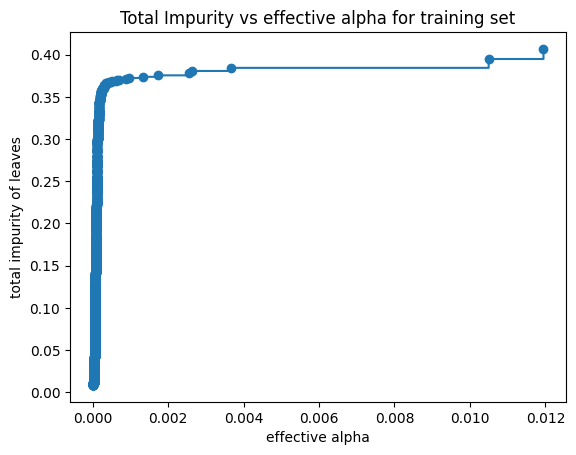

In [29]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

##Sample로 실험 진행

In [30]:
df_sample = df[:3500].copy()
X = df_sample.drop(columns=['cardio'], axis=1) 
y = df_sample['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2023, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=2023, stratify=y_test)

In [31]:
clfs = []
for ccp_alpha in ccp_alphas:
    FullTree_post = DecisionTreeClassifier(random_state=2023, ccp_alpha=ccp_alpha)
    FullTree_post.fit(X_train, y_train)
    clfs.append(FullTree_post)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 3 with ccp_alpha: 0.09313140567037065


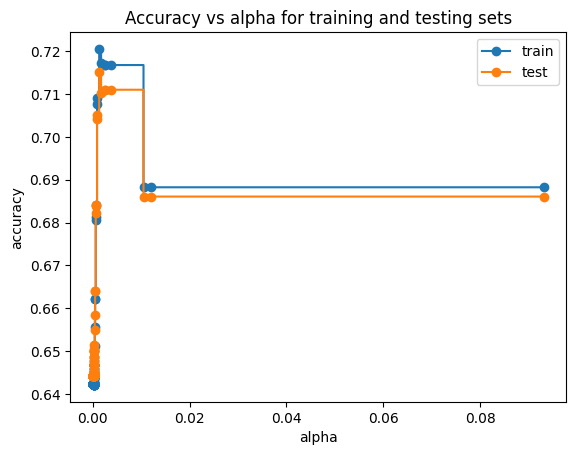

In [35]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

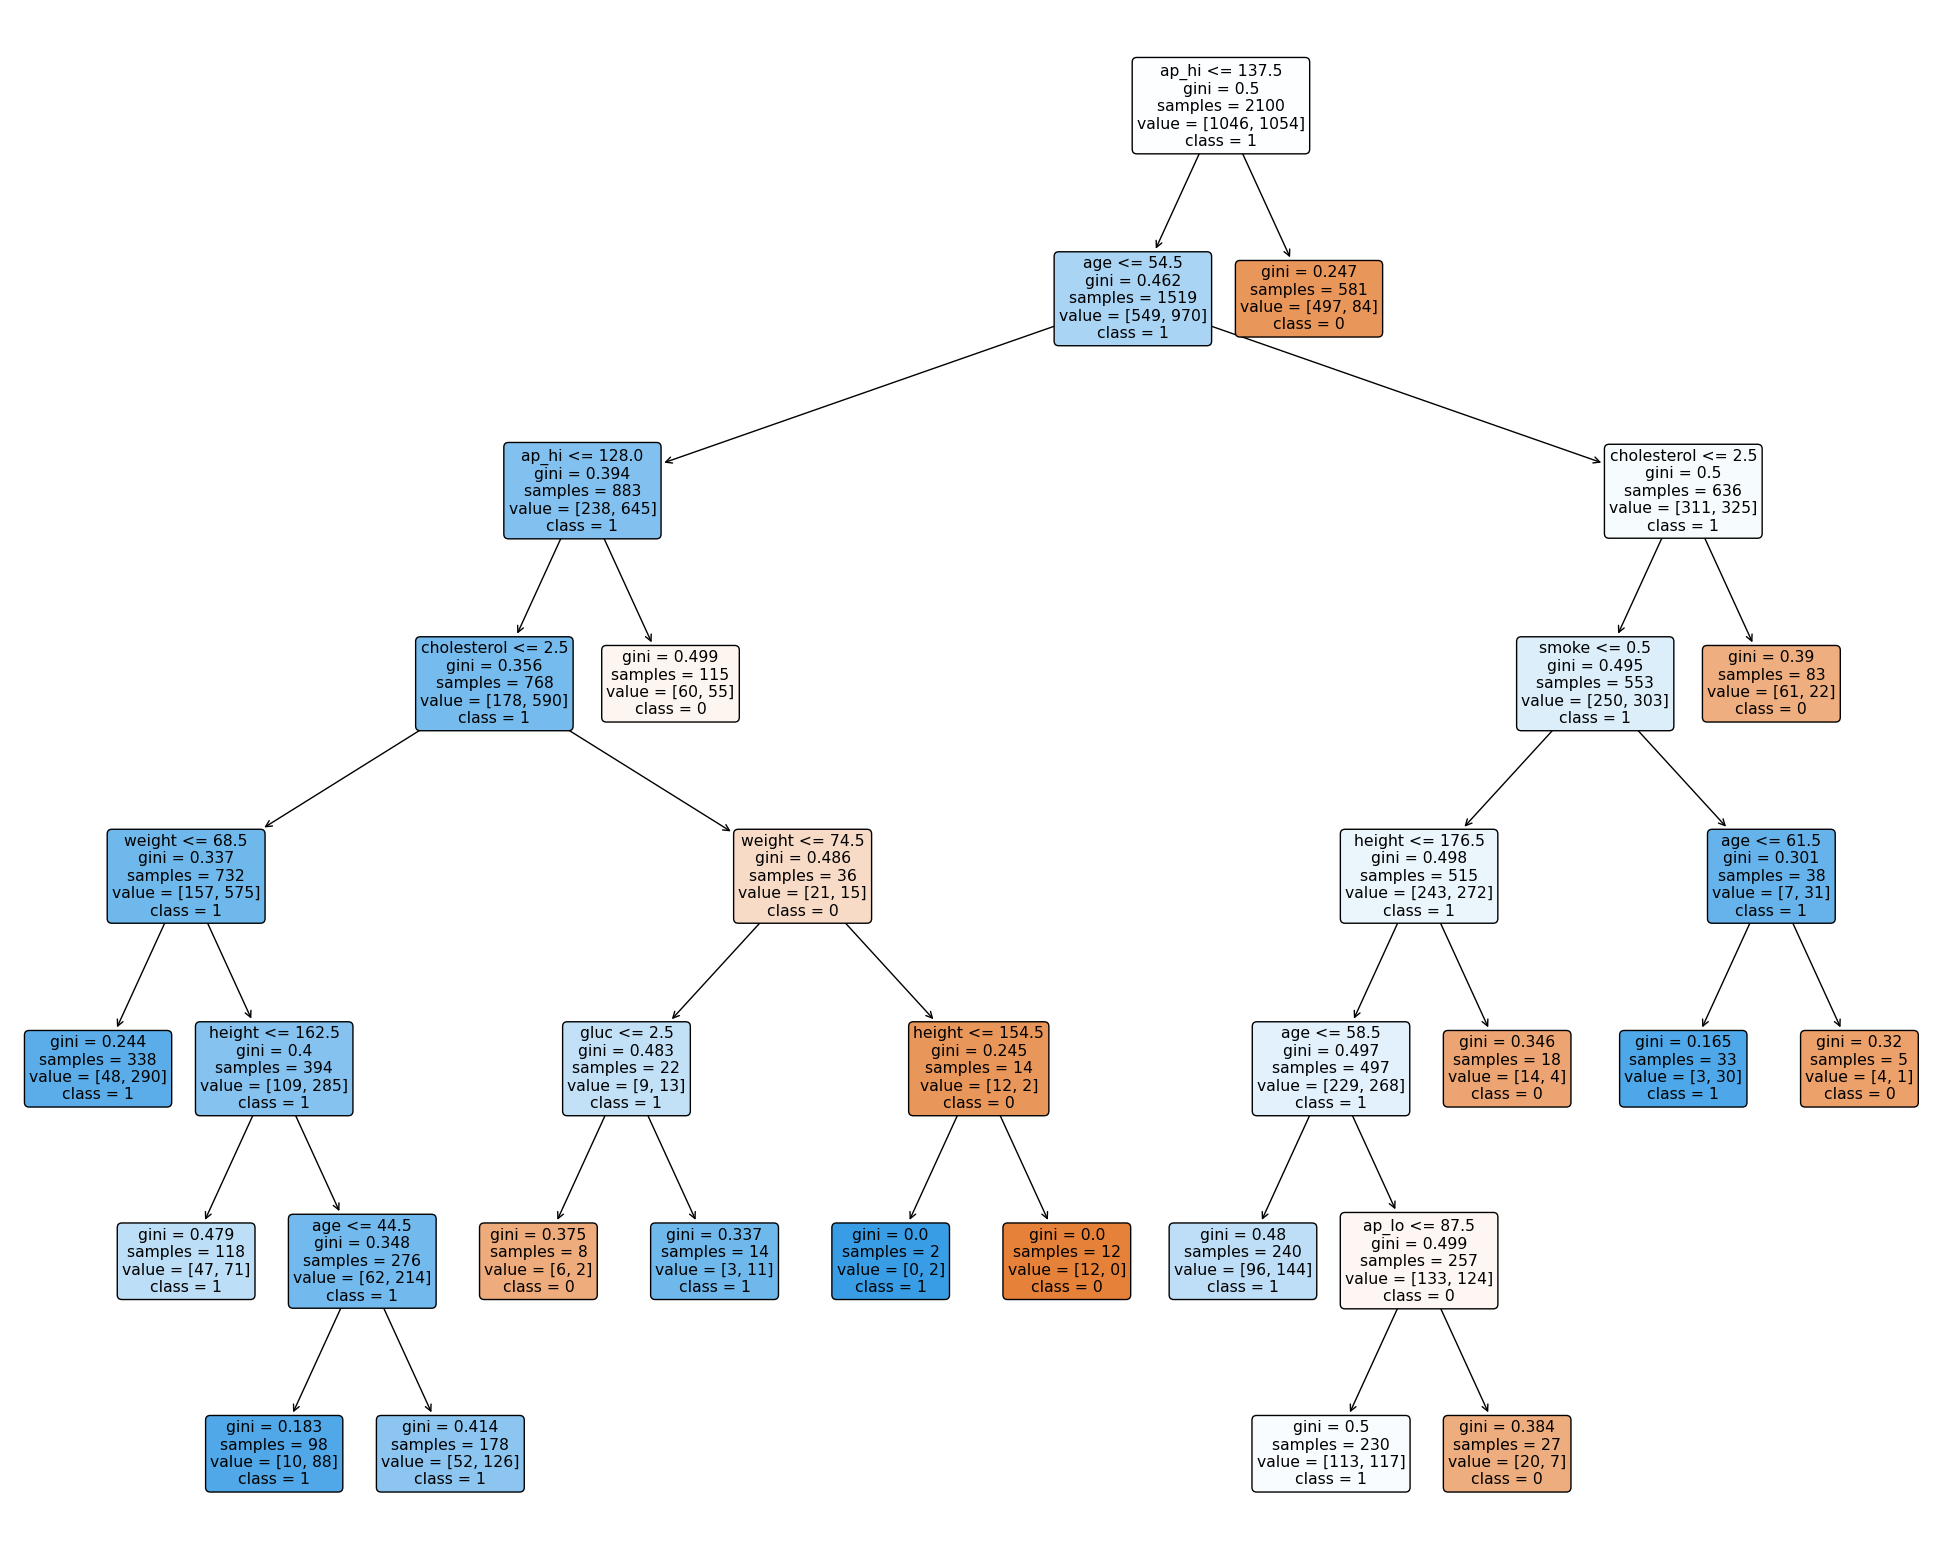

In [36]:
best_clf = clfs[np.argmax(test_scores)]
fig = plt.figure(figsize=(25,20))
_ = plot_tree(best_clf,
              feature_names=X_train.columns.values,
              class_names=list(map(str, y_train.unique())),
              rounded=True,
              filled=True)

In [32]:
df_tree = df.copy()
X = df_tree.drop(columns=['cardio'], axis=1) 
y = df_tree['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2023, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=2023, stratify=y_test)

In [37]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score

y_test_pred = best_clf.predict(X_test)

# Calculate True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN)
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_test_pred).ravel()

# Calculate True Positive Rate (TPR), True Negative Rate (TNR), Precision, and Recall
tpr_test = tp_test / (tp_test + fn_test)
tnr_test = tn_test / (tn_test + fp_test)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)

# Calculate Accuracy, Balanced Accuracy (BCR), F1-Score, and AUROC
accuracy_test = (tp_test + tn_test) / (tp_test + tn_test + fp_test + fn_test)
bcr_test = (tpr_test + tnr_test) / 2
f1_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)
auroc_test = roc_auc_score(y_test, y_test_pred)

# Print evaluation results
print("Test Data:")
print("Accuracy:", round(accuracy_test, 3))
print("BCR (Balanced Accuracy):", round(bcr_test, 3))
print("AUROC:", round(auroc_test, 3))
print("F1 Score:", round(f1_test, 3))
print("Precision:", round(precision_test, 3))
print("Recall (Sensitivity):", round(recall_test, 3))
print("TPR (Sensitivity):", round(tpr_test, 3))
print("TNR (Specificity):", round(tnr_test, 3))


Test Data:
Accuracy: 0.715
BCR (Balanced Accuracy): 0.715
AUROC: 0.715
F1 Score: 0.738
Precision: 0.683
Recall (Sensitivity): 0.803
TPR (Sensitivity): 0.803
TNR (Specificity): 0.628


#Q3.

##FullTree 그림을 바탕으로 규칙 찾기

In [38]:
df_sample = df[:3500].copy()
X = df_sample.drop(columns=['cardio'], axis=1) 
y = df_sample['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2023, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=2023, stratify=y_test)

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

# Create the decision tree classifier object with default parameters
FullTree = DecisionTreeClassifier()

# Fit the decision tree classifier to the training data
FullTree.fit(X_train, y_train)

y_pred = FullTree.predict(X_test)
acc_after_pruning = FullTree.score(X_test, y_test)

In [40]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score

y_train_pred = FullTree.predict(X_train)
y_test_pred = FullTree.predict(X_test)

# Calculate True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN)
tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train, y_train_pred).ravel()
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_test_pred).ravel()

# Calculate True Positive Rate (TPR), True Negative Rate (TNR), Precision, and Recall
tpr_train = tp_train / (tp_train + fn_train)
tnr_train = tn_train / (tn_train + fp_train)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)

tpr_test = tp_test / (tp_test + fn_test)
tnr_test = tn_test / (tn_test + fp_test)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)

# Calculate Accuracy, Balanced Accuracy (BCR), F1-Score, and AUROC
accuracy_train = (tp_train + tn_train) / (tp_train + tn_train + fp_train + fn_train)
accuracy_test = (tp_test + tn_test) / (tp_test + tn_test + fp_test + fn_test)

bcr_train = (tpr_train + tnr_train) / 2
bcr_test = (tpr_test + tnr_test) / 2

f1_train = 2 * (precision_train * recall_train) / (precision_train + recall_train)
f1_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)

auroc_train = roc_auc_score(y_train, y_train_pred)
auroc_test = roc_auc_score(y_test, y_test_pred)

# Print evaluation results
print("Training Data:")
print("Accuracy:", round(accuracy_train, 3))
print("BCR (Balanced Accuracy):", round(bcr_train, 3))
print("AUROC:", round(auroc_train, 3))
print("F1 Score:", round(f1_train, 3))
print("Precision:", round(precision_train, 3))
print("Recall (Sensitivity):", round(recall_train, 3))
print("TPR (Sensitivity):", round(tpr_train, 3))
print("TNR (Specificity):", round(tnr_train, 3))
print()

print("Test Data:")
print("Accuracy:", round(accuracy_test, 3))
print("BCR (Balanced Accuracy):", round(bcr_test, 3))
print("AUROC:", round(auroc_test, 3))
print("F1 Score:", round(f1_test, 3))
print("Precision:", round(precision_test, 3))
print("Recall (Sensitivity):", round(recall_test, 3))
print("TPR (Sensitivity):", round(tpr_test, 3))
print("TNR (Specificity):", round(tnr_test, 3))

Training Data:
Accuracy: 0.999
BCR (Balanced Accuracy): 0.999
AUROC: 0.999
F1 Score: 0.999
Precision: 1.0
Recall (Sensitivity): 0.997
TPR (Sensitivity): 0.997
TNR (Specificity): 1.0

Test Data:
Accuracy: 0.623
BCR (Balanced Accuracy): 0.623
AUROC: 0.623
F1 Score: 0.633
Precision: 0.618
Recall (Sensitivity): 0.65
TPR (Sensitivity): 0.65
TNR (Specificity): 0.596


In [41]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score

y_test_pred = FullTree_post.predict(X_test)

# Calculate True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN)
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_test_pred).ravel()

# Calculate True Positive Rate (TPR), True Negative Rate (TNR), Precision, and Recall
tpr_test = tp_test / (tp_test + fn_test)
tnr_test = tn_test / (tn_test + fp_test)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)

# Calculate Accuracy, Balanced Accuracy (BCR), F1-Score, and AUROC
accuracy_test = (tp_test + tn_test) / (tp_test + tn_test + fp_test + fn_test)
bcr_test = (tpr_test + tnr_test) / 2
f1_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)
auroc_test = roc_auc_score(y_test, y_test_pred)

# Print evaluation results
print("Test Data:")
print("Accuracy:", round(accuracy_test, 3))
print("BCR (Balanced Accuracy):", round(bcr_test, 3))
print("AUROC:", round(auroc_test, 3))
print("F1 Score:", round(f1_test, 3))
print("Precision:", round(precision_test, 3))
print("Recall (Sensitivity):", round(recall_test, 3))
print("TPR (Sensitivity):", round(tpr_test, 3))
print("TNR (Specificity):", round(tnr_test, 3))


Test Data:
Accuracy: 0.683
BCR (Balanced Accuracy): 0.682
AUROC: 0.682
F1 Score: 0.749
Precision: 0.621
Recall (Sensitivity): 0.946
TPR (Sensitivity): 0.946
TNR (Specificity): 0.418


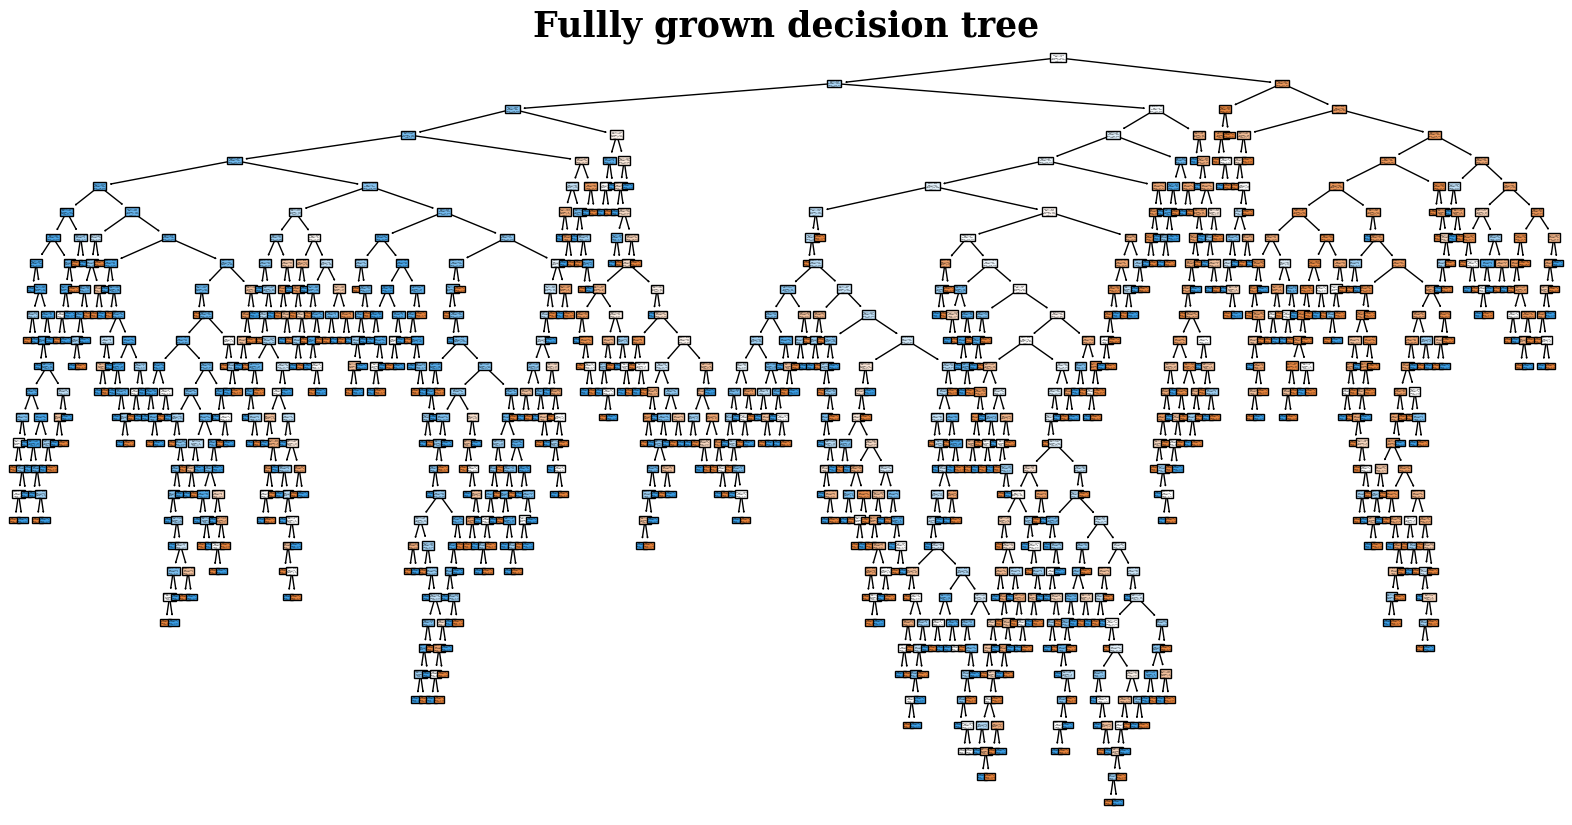

In [42]:
feature_names = df_sample.columns.tolist()
target_names = df_sample['cardio'].unique().tolist()
target_names = [str(class_name) for class_name in target_names]

fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(FullTree, filled=True, feature_names=feature_names, class_names=target_names, ax=ax)
plt.title('Fullly grown decision tree', fontdict={'fontsize': 25, 'fontweight': 'bold', 'fontfamily': 'serif'})
plt.show()

In [43]:
'''
from sklearn import tree

depths = []  # Store the depth of each node
samples_in_leaves = []  # Store the number of samples in leaf nodes
num_leaves = 0  # Initialize the number of leaf nodes
samples_in_splits = []  # Store the number of samples for splitting nodes

def get_tree_statistics(tree, node_id=0, depth=0):
    global num_leaves  # Add the global keyword

    if tree.children_left[node_id] == tree.TREE_LEAF:
        # Leaf node
        samples_in_leaves.append(tree.n_node_samples[node_id])
        depths.append(depth)
        num_leaves += 1
    else:
        # Splitting node
        samples_in_splits.append(tree.n_node_samples[node_id])
        left_child_id = tree.children_left[node_id]
        right_child_id = tree.children_right[node_id]
        get_tree_statistics(tree, left_child_id, depth + 1)
        get_tree_statistics(tree, right_child_id, depth + 1)

# Calculate the tree statistics
get_tree_statistics(FullTree.tree_)

total = 0
for num in depths:
    total += num

# Calculate the minimum, maximum, and average values for each metric
min_depth = min(depths)
max_depth = max(depths)
avg_depth = float(total) / float(len(depths))  # Convert to float

total = 0
for num in samples_in_leaves:
    total += num

min_samples_in_leaves = min(samples_in_leaves)
max_samples_in_leaves = max(samples_in_leaves)
avg_samples_in_leaves = float(total) / float(len(samples_in_leaves))  # Convert to float

num_leaves = len(samples_in_leaves)  # Correct the num_leaves assignment

total = 0
for num in samples_in_splits:
    total += num

min_samples_in_splits = min(samples_in_splits)
max_samples_in_splits = max(samples_in_splits)
avg_samples_in_splits = float(total) / float(len(samples_in_splits))  # Convert to float

# Print the minimum, maximum, and average values for each metric
print("Depth: Minimum={}, Maximum={}, Average={}".format(min_depth, max_depth, avg_depth))
print("Samples in Leaves: Minimum={}, Maximum={}, Average={}".format(min_samples_in_leaves, max_samples_in_leaves, avg_samples_in_leaves))
print("Number of Leaves: Minimum={}, Maximum={}, Average={}".format(num_leaves, num_leaves, num_leaves))
print("Samples in Splits: Minimum={}, Maximum={}, Average={}".format(min_samples_in_splits, max_samples_in_splits, avg_samples_in_splits))
'''


'\nfrom sklearn import tree\n\ndepths = []  # Store the depth of each node\nsamples_in_leaves = []  # Store the number of samples in leaf nodes\nnum_leaves = 0  # Initialize the number of leaf nodes\nsamples_in_splits = []  # Store the number of samples for splitting nodes\n\ndef get_tree_statistics(tree, node_id=0, depth=0):\n    global num_leaves  # Add the global keyword\n\n    if tree.children_left[node_id] == tree.TREE_LEAF:\n        # Leaf node\n        samples_in_leaves.append(tree.n_node_samples[node_id])\n        depths.append(depth)\n        num_leaves += 1\n    else:\n        # Splitting node\n        samples_in_splits.append(tree.n_node_samples[node_id])\n        left_child_id = tree.children_left[node_id]\n        right_child_id = tree.children_right[node_id]\n        get_tree_statistics(tree, left_child_id, depth + 1)\n        get_tree_statistics(tree, right_child_id, depth + 1)\n\n# Calculate the tree statistics\nget_tree_statistics(FullTree.tree_)\n\ntotal = 0\nfor num 

##Pre pruning 하이퍼파라미터 튜닝

In [44]:
df_tree = df.copy()
X = df_tree.drop(columns=['cardio'], axis=1) 
y = df_tree['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2023, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=2023, stratify=y_test)

In [45]:
import copy

# set the hyperparameters for pre-pruning
param_grid = {'criterion' : ["gini", "entropy", "log_loss"],
              'max_depth': [10, 20, 30, None],
              'min_samples_split': [40, 60, 100, None],
              'min_samples_leaf': [35, 40, 50, None],
              'max_leaf_nodes': [450, 500, 549]}


FullTree_pre = copy.deepcopy(FullTree)

# perform grid search to find the best hyperparameters based on AUROC for validation data
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(FullTree_pre, param_grid, scoring='roc_auc', cv=5,  refit=True) 
grid_search.fit(X_train, y_train)

# get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters for pre-pruning:", best_params)

# create a new DecisionTreeClassifier object with the best hyperparameters
FullTree_pre = DecisionTreeClassifier(**best_params)

# train the decision tree on the learning data
FullTree_pre.fit(X_train, y_train)

# Evaluate the decision tree on the verification data
y_val_pred = FullTree_pre.predict(X_val)
auroc = roc_auc_score(y_val, y_val_pred)


# extract hyperparameters and results
results = pd.DataFrame.from_dict(grid_search.cv_results_)
cols_to_keep = ['params', 'mean_test_score']
results = results[cols_to_keep]
results['params'] = results['params'].apply(lambda x: str(x).replace('{', '').replace('}', ''))
results['mean_test_score'] = results['mean_test_score'].round(3)

# print results in a table format
#print('\nResults:')
#print(results.to_string(index=False))

Best hyperparameters for pre-pruning: {'criterion': 'log_loss', 'max_depth': 10, 'max_leaf_nodes': 500, 'min_samples_leaf': 50, 'min_samples_split': 60}


In [46]:
results

,params,mean_test_score
0,"'criterion': 'gini', 'max_depth': 10, 'max_lea...",0.792
1,"'criterion': 'gini', 'max_depth': 10, 'max_lea...",0.792
2,"'criterion': 'gini', 'max_depth': 10, 'max_lea...",0.793
3,"'criterion': 'gini', 'max_depth': 10, 'max_lea...",NaN
4,"'criterion': 'gini', 'max_depth': 10, 'max_lea...",0.793
...,...,...
571,"'criterion': 'log_loss', 'max_depth': None, 'm...",NaN
572,"'criterion': 'log_loss', 'max_depth': None, 'm...",NaN
573,"'criterion': 'log_loss', 'max_depth': None, 'm...",NaN
574,"'criterion': 'log_loss', 'max_depth': None, 'm...",NaN


In [47]:
# Calculate maximum, minimum, and average AUROC values
max_auroc = results['mean_test_score'].max()
min_auroc = results['mean_test_score'].min()
avg_auroc = results['mean_test_score'].mean()

print("Maximum AUROC:", max_auroc)
print("Minimum AUROC:", min_auroc)
print("Average AUROC:", avg_auroc)

Maximum AUROC: 0.794
Minimum AUROC: 0.784
Average AUROC: 0.7880864197530865


In [48]:
param_grid = {'criterion': 'log_loss', 'max_depth': [10], 'max_leaf_nodes': [450], 'min_samples_leaf': [50], 'min_samples_split': [100]}

# create a new DecisionTreeClassifier object with the hyperparameters from param_grid
FullTree_pre = DecisionTreeClassifier(max_depth=10,
                                      max_leaf_nodes=450,
                                      min_samples_leaf=50,
                                      min_samples_split=100)

# train the decision tree on the learning data
# Train the final model on the combined training and validation data
X_train_val = np.concatenate((X_train, X_val), axis=0)
y_train_val = np.concatenate((y_train, y_val), axis=0)

FullTree_pre.fit(X_train_val, y_train_val)

# Evaluate the decision tree on the test data
y_test_pred = FullTree_pre.predict(X_test)
auroc = roc_auc_score(y_test, y_test_pred)
print("AUROC on test data:", auroc)

AUROC on test data: 0.7292692993532407


In [49]:
y_test_pred = FullTree_pre.predict(X_test)

# Calculate True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN)
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_test_pred).ravel()

# Calculate True Positive Rate (TPR), True Negative Rate (TNR), Precision, and Recall
tpr_test = tp_test / (tp_test + fn_test)
tnr_test = tn_test / (tn_test + fp_test)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)

# Calculate Accuracy, Balanced Accuracy (BCR), F1-Score, and AUROC
accuracy_test = (tp_test + tn_test) / (tp_test + tn_test + fp_test + fn_test)
bcr_test = (tpr_test + tnr_test) / 2
f1_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)
auroc_test = roc_auc_score(y_test, y_test_pred)

# Print evaluation results
print("Test Data:")
print("Accuracy:", round(accuracy_test, 3))
print("BCR (Balanced Accuracy):", round(bcr_test, 3))
print("AUROC:", round(auroc_test, 3))
print("F1 Score:", round(f1_test, 3))
print("Precision:", round(precision_test, 3))
print("Recall (Sensitivity):", round(recall_test, 3))
print("TPR (Sensitivity):", round(tpr_test, 3))
print("TNR (Specificity):", round(tnr_test, 3))

Test Data:
Accuracy: 0.729
BCR (Balanced Accuracy): 0.729
AUROC: 0.729
F1 Score: 0.737
Precision: 0.717
Recall (Sensitivity): 0.758
TPR (Sensitivity): 0.758
TNR (Specificity): 0.701


#Q4.

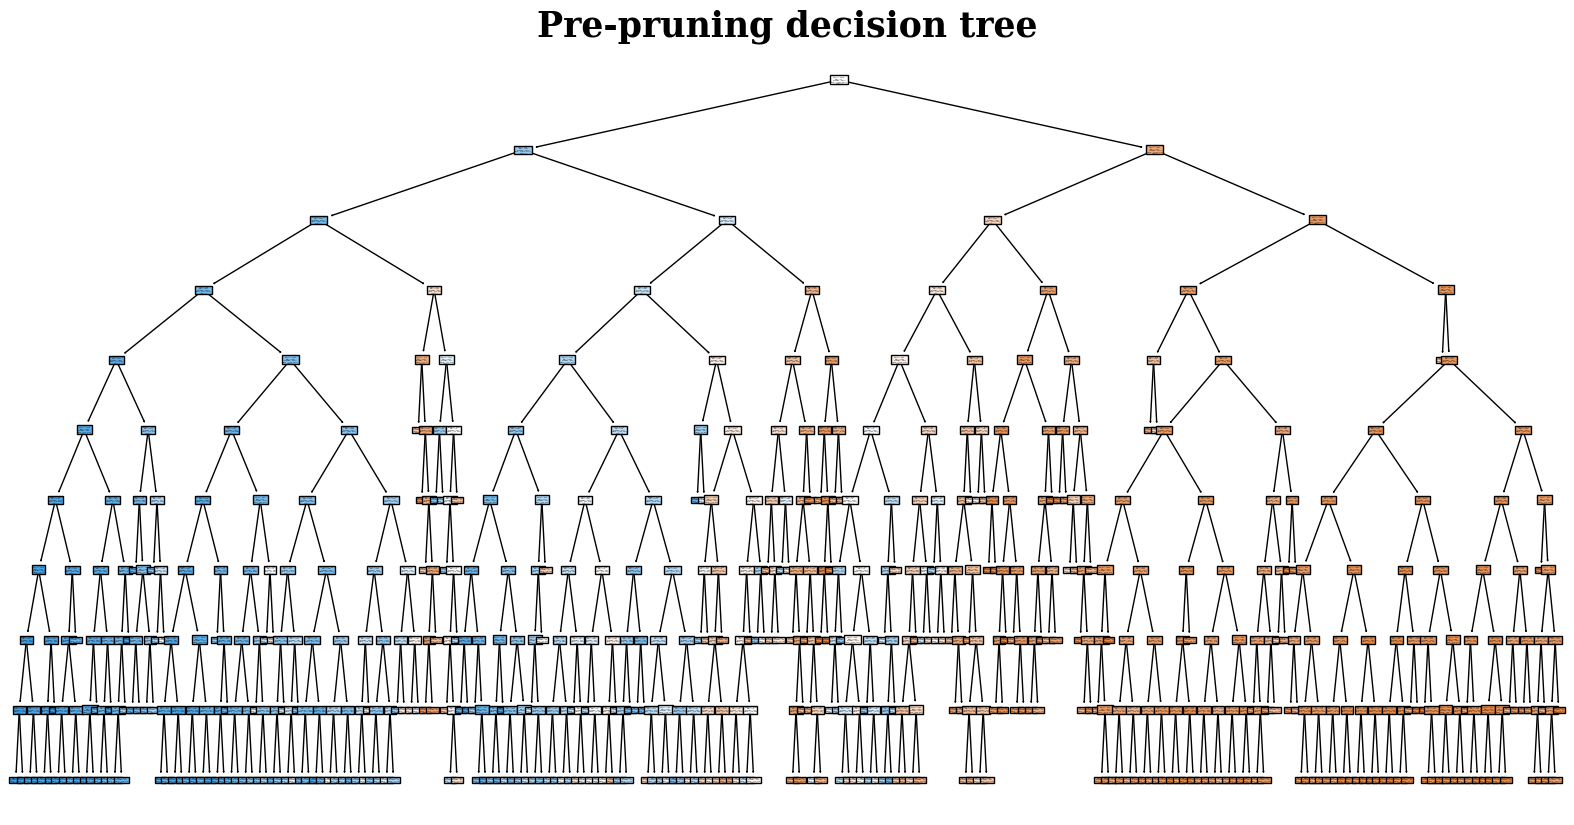

In [50]:
feature_names = df_tree.columns.tolist()
target_names = df_tree['cardio'].unique().tolist()
target_names = [str(class_name) for class_name in target_names]

fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(FullTree_pre, filled=True, feature_names=feature_names, class_names=target_names, ax=ax)
plt.title('Pre-pruning decision tree', fontdict={'fontsize': 25, 'fontweight': 'bold', 'fontfamily': 'serif'})
plt.show()

In [51]:
importance = FullTree_pre.feature_importances_
variable_counts = dict(zip(feature_names, importance))

print("Variable Importance:")
for variable, count in variable_counts.items():
    print(variable, ":", count)

Variable Importance:
age : 0.12614616103308407
gender : 0.003200605823761715
height : 0.012794243389888276
weight : 0.02776159288409256
ap_hi : 0.7270443940443112
ap_lo : 0.011588175549301584
cholesterol : 0.07376621501998154
gluc : 0.007343119470166813
smoke : 0.0032611580451457024
alco : 0.0002796305531938787
active : 0.006814704187072557


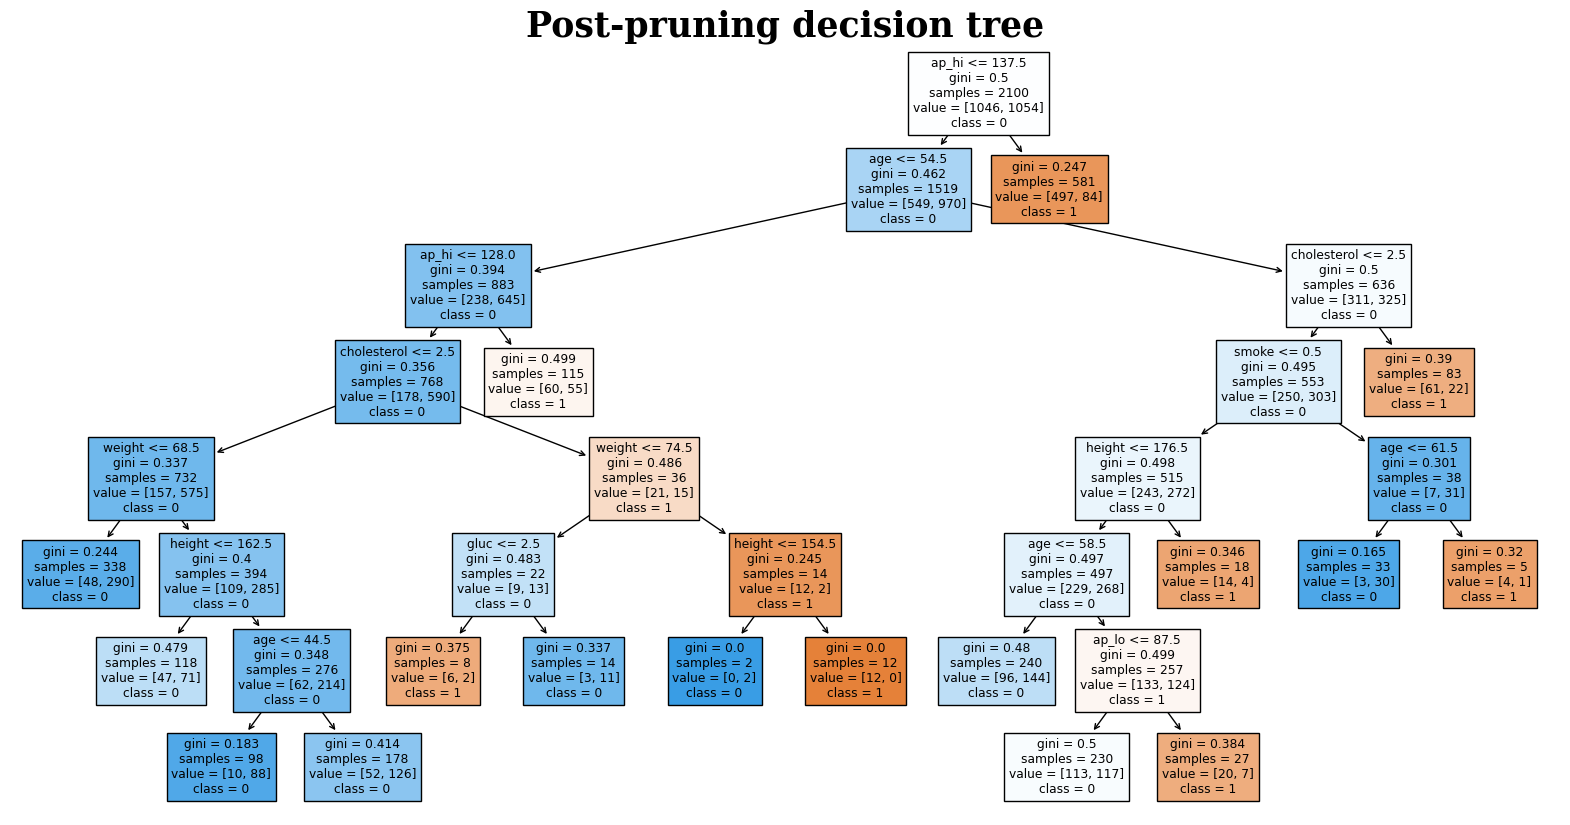

In [52]:
feature_names = df_tree.columns.tolist()
target_names = df_tree['cardio'].unique().tolist()
target_names = [str(class_name) for class_name in target_names]

fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(best_clf, filled=True, feature_names=feature_names, class_names=target_names, ax=ax)
plt.title('Post-pruning decision tree', fontdict={'fontsize': 25, 'fontweight': 'bold', 'fontfamily': 'serif'})
plt.show()

In [53]:
importance = best_clf.feature_importances_
variable_counts = dict(zip(feature_names, importance))

print("Variable Importance:")
for variable, count in variable_counts.items():
    print(variable, ":", count)

Variable Importance:
age : 0.1478309628481093
gender : 0.0
height : 0.03668896985994272
weight : 0.030910258748659762
ap_hi : 0.6838981372166723
ap_lo : 0.009265587500803316
cholesterol : 0.06435728896494347
gluc : 0.009004438723694084
smoke : 0.018044356137175054
alco : 0.0
active : 0.0




#Q5.

#Q6.

##k-fold로 hidden node 범위 조정

In [54]:
df_nn = df.copy()
X = df_nn.drop(columns=['cardio'], axis=1) 
y = df_nn['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2023, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=2023, stratify=y_test)

In [55]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsRegressor

In [56]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold

# Find the best number of hidden nodes in terms of AUROC
# Candidate hidden nodes
hidden = np.arange(5, 101, 5)

# 5-fold cross validation index
kf = KFold(n_splits=5)
val_perf = pd.DataFrame(columns=['hidden', 'ACC', 'BCR', 'AUROC'])

for i, hidden_nodes in enumerate(hidden):
    print(f"Training ANN: the number of hidden nodes: {hidden_nodes}")
    eval_fold = []

    for train_index, val_index in kf.split(X_train):  #X_val을 사용해야하나...
        # Training with the data in (k-1) folds
        tmp_trn_input = X_train.iloc[train_index]
        tmp_trn_target = y_train.iloc[train_index]
        tmp_net = MLPClassifier(hidden_layer_sizes=(hidden_nodes,), max_iter=400, verbose=True)
        tmp_net.fit(tmp_trn_input, tmp_trn_target)

        # Evaluate the model with the remaining 1 fold
        tmp_val_input = X_train.iloc[val_index]
        tmp_val_target = y_train.iloc[val_index]

        eval_fold.append(confusion_matrix(tmp_val_target, tmp_net.predict(tmp_val_input)))

    # Confusion matrix
    cm = np.mean(eval_fold, axis=0).astype(float)

    # Simple Accuracy
    ACC = np.trace(cm) / np.sum(cm)
    
    # Balanced Correction Rate
    BCR = np.power(np.prod(np.diag(cm) / np.sum(cm, axis=1)), 1 / cm.shape[0])

    eval_labels = np.concatenate([y_train.iloc[val_index] for _, val_index in kf.split(X_train)])
    eval_probs = np.concatenate([tmp_net.predict_proba(X_train.iloc[val_index])[:, 1] for _, val_index in kf.split(X_train)])
    AUROC = roc_auc_score(eval_labels, eval_probs)
  
    # Append the values to the DataFrame
    val_perf = val_perf.append({'hidden': int(hidden_nodes), 'ACC': float(ACC), 'BCR': float(BCR), 'AUROC': float(AUROC)}, ignore_index=True)


# Sort based on AUROC in descending order
ordered_kfold = val_perf.sort_values(by='AUROC', ascending=False)

Training ANN: the number of hidden nodes: 5
Iteration 1, loss = 3.96906291
Iteration 2, loss = 1.36654499
Iteration 3, loss = 1.19424910
Iteration 4, loss = 1.07697543
Iteration 5, loss = 0.96589521
Iteration 6, loss = 0.86210798
Iteration 7, loss = 0.76119653
Iteration 8, loss = 0.70166526
Iteration 9, loss = 0.65134576
Iteration 10, loss = 0.62214200
Iteration 11, loss = 0.62051511
Iteration 12, loss = 0.61194793
Iteration 13, loss = 0.60772259
Iteration 14, loss = 0.60828551
Iteration 15, loss = 0.60672126
Iteration 16, loss = 0.60738030
Iteration 17, loss = 0.60490832
Iteration 18, loss = 0.60242889
Iteration 19, loss = 0.60404440
Iteration 20, loss = 0.60186369
Iteration 21, loss = 0.60173413
Iteration 22, loss = 0.60908078
Iteration 23, loss = 0.60263919
Iteration 24, loss = 0.60048931
Iteration 25, loss = 0.60221921
Iteration 26, loss = 0.59979824
Iteration 27, loss = 0.59576894
Iteration 28, loss = 0.59838782
Iteration 29, loss = 0.59862459
Iteration 30, loss = 0.59844647
Itera

In [57]:
ordered_kfold

,hidden,ACC,BCR,AUROC
17,90.0,0.715833,0.710669,0.788460
16,85.0,0.719024,0.718691,0.787316
10,55.0,0.711024,0.710029,0.786957
19,100.0,0.711548,0.707975,0.786170
7,40.0,0.716738,0.716083,0.785948
18,95.0,0.712619,0.712619,0.785771
14,75.0,0.719286,0.719285,0.785610
6,35.0,0.718286,0.717706,0.785537
3,20.0,0.711762,0.705641,0.784323
11,60.0,0.719976,0.719974,0.784238


##Grid Search로 하이퍼파라미터 조합 탐색

In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from itertools import product


# Define the hyperparameters to search
learning_rates = [0.01, 0.05, 0.1]
activation_functions = ['sigmoid', 'relu', 'tanh']
num_hidden_layers = [1, 2, 3]
num_hidden_nodes = [65, 75, 85]

# Create a DataFrame to store hyperparameters and AUROC scores
results = pd.DataFrame(columns=['Learning Rate', 'Activation Function', 'Hidden Layers', 'Hidden Nodes', 'AUROC'])

# Perform grid search
for lr, activation, num_layers, num_nodes in product(learning_rates, activation_functions, num_hidden_layers, num_hidden_nodes):
    # Create and train the neural network
    model = Sequential()
    model.add(Dense(num_nodes, activation=activation, input_shape=(X_train.shape[1],)))
    for _ in range(num_layers - 1):
        model.add(Dense(num_nodes, activation=activation))
    model.add(Dense(1, activation=activation))
    model.compile(loss='binary_crossentropy', optimizer='adam')
    model.fit(X_train, y_train, epochs=20, batch_size=64, verbose=0)
    
    # Predict probabilities on the verification set
    y_val_pred = model.predict(X_val)
    
    
    # Calculate AUROC
    auroc = roc_auc_score(y_val, y_val_pred)
    
    # Store the results
    results = results.append({'Learning Rate': lr, 'Activation Function': activation,
                              'Hidden Layers': num_layers, 'Hidden Nodes': num_nodes,
                              'AUROC': auroc}, ignore_index=True)

# Find the optimal hyperparameter combination based on AUROC
optimal_hyperparameters = results.loc[results['AUROC'].idxmax()]

# Print the optimal hyperparameters and AUROC
print("Optimal Hyperparameters:")
print(optimal_hyperparameters)

# Print all hyperparameter combinations and AUROC scores
print("All Hyperparameter Combinations and AUROC:")
print(results)

438/438 [==============================] - 1s 1ms/step


In [ ]:
# Use the optimal hyperparameters to create and train the final model
optimal_lr = optimal_hyperparameters['Learning Rate']
optimal_activation = optimal_hyperparameters['Activation Function']
optimal_num_layers = int(optimal_hyperparameters['Hidden Layers'])
optimal_num_nodes = int(optimal_hyperparameters['Hidden Nodes'])

final_model = Sequential()
final_model.add(Dense(optimal_num_nodes, activation=optimal_activation, input_shape=(X_train.shape[1],)))
for _ in range(optimal_num_layers - 1):
    final_model.add(Dense(optimal_num_nodes, activation=optimal_activation))
final_model.add(Dense(1, activation='sigmoid'))
final_model.compile(loss='binary_crossentropy', optimizer='adam')

# Train the final model on the combined training and validation data
X_train_val = np.concatenate((X_train, X_val), axis=0)
y_train_val = np.concatenate((y_train, y_val), axis=0)
final_model.fit(X_train_val, y_train_val, epochs=10, batch_size=64, verbose=0)

# Predict probabilities on the test set
y_test_pred = final_model.predict(X_test)

# Calculate AUROC on the test set
test_auroc = roc_auc_score(y_test, y_test_pred)

# Print the AUROC on the test set
print("AUROC on Test Set:", test_auroc)

In [ ]:
# Convert predicted probabilities to binary predictions
y_test_pred_binary = (y_test_pred >= 0.5).astype(int)

# Calculate True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN)
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_test_pred_binary).ravel()

# Calculate True Positive Rate (TPR), True Negative Rate (TNR), Precision, and Recall
tpr_test = tp_test / (tp_test + fn_test)
tnr_test = tn_test / (tn_test + fp_test)
precision_test = precision_score(y_test, y_test_pred_binary)
recall_test = recall_score(y_test, y_test_pred_binary)

# Calculate Accuracy, Balanced Accuracy (BCR), F1-Score, and AUROC
accuracy_test = (tp_test + tn_test) / (tp_test + tn_test + fp_test + fn_test)
bcr_test = (tpr_test + tnr_test) / 2
f1_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)
auroc_test = roc_auc_score(y_test, y_test_pred)

# Print evaluation results
print("Test Data:")
print("Accuracy:", round(accuracy_test, 3))
print("BCR (Balanced Accuracy):", round(bcr_test, 3))
print("AUROC:", round(auroc_test, 3))
print("F1 Score:", round(f1_test, 3))
print("Precision:", round(precision_test, 3))
print("Recall (Sensitivity):", round(recall_test, 3))
print("TPR (Sensitivity):", round(tpr_test, 3))
print("TNR (Specificity):", round(tnr_test, 3))

In [ ]:
import numpy as np

# Calculate min, max, and mean AUROC
min_auroc = results['AUROC'].min()
max_auroc = results['AUROC'].max()
mean_auroc = results['AUROC'].mean()

# Print the min, max, and mean AUROC
print("Minimum AUROC:", min_auroc)
print("Maximum AUROC:", max_auroc)
print("Mean AUROC:", mean_auroc)


#Q7.

##Logistic Regression

In [ ]:
# Train the final model on the combined training and validation data
X_train_val = np.concatenate((X_train, X_val), axis=0)
y_train_val = np.concatenate((y_train, y_val), axis=0)

# Create the logistic regression model
Logistic_model = LogisticRegression()

# Train the model on the training data
Logistic_model.fit(X_train_val, y_train_val)

In [ ]:
y_test_pred = Logistic_model.predict(X_test)

# Calculate True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN)
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_test_pred).ravel()

# Calculate True Positive Rate (TPR), True Negative Rate (TNR), Precision, and Recall
tpr_test = tp_test / (tp_test + fn_test)
tnr_test = tn_test / (tn_test + fp_test)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)

# Calculate Accuracy, Balanced Accuracy (BCR), F1-Score, and AUROC
accuracy_test = (tp_test + tn_test) / (tp_test + tn_test + fp_test + fn_test)
bcr_test = (tpr_test + tnr_test) / 2
f1_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)
auroc_test = roc_auc_score(y_test, y_test_pred)

# Print evaluation results
print("Test Data:")
print("Accuracy:", round(accuracy_test, 3))
print("BCR (Balanced Accuracy):", round(bcr_test, 3))
print("AUROC:", round(auroc_test, 3))
print("F1 Score:", round(f1_test, 3))
print("Precision:", round(precision_test, 3))
print("Recall (Sensitivity):", round(recall_test, 3))
print("TPR (Sensitivity):", round(tpr_test, 3))
print("TNR (Specificity):", round(tnr_test, 3))

#Q8.

##데이터 확인

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/다변량분석/homework3/data.csv')

In [ ]:
df.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)

In [ ]:
#plt.figure(figsize=(5,5))
#sns.countplot(data=df, x='diagnosis')

In [ ]:
df['diagnosis'].replace({"M":1,"B":0},inplace=True)

In [ ]:
df.shape

In [ ]:
df.describe()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

X=df.drop('diagnosis', axis=1)
y=df['diagnosis']

robust = RobustScaler()
X = robust.fit_transform(X)

# 전체 데이터를 train:test = 8:2 비율로 분할
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=2023) #random_state 삭제해보기

# train_val 데이터를 train:val = 6:2 비율로 분할
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=2023)

# train, val, test 데이터 개수 출력
print("Train set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Test set size:", len(X_test))

##Train / Test / Split 분할기준

In [ ]:
#기존 cardio는 50.03 %임, cardio가 0

df_split = df.copy()
X = df_split.drop(columns=['diagnosis'], axis=1) 
y = df_split['diagnosis']
train_100 = round((y == 0).mean() * 100, 3)
print(train_100)

In [ ]:
# Stratify를 사용해야하는 이유

sum = 0
for i in range(1,30): 
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)#, stratify=y)
  X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=i)#, stratify=y_test)
  temp = (y_validation == 0).mean() * 100
  sum += temp

train_80 = round(sum / 30, 3)
train_80

In [ ]:
# 8: 1: 1

sum = 0
for i in range(1,30): 
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i, stratify=y)
  X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=i, stratify=y_test)
  temp = (y_validation == 0).mean() * 100
  sum += temp

train_80 = round(sum / 30, 3)
train_80

In [ ]:
# 7: 1.5: 1.5

sum = 0
for i in range(1,30): 
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
  X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=i, stratify=y_test)
  temp = (y_validation == 0).mean() * 100
  sum += temp

train_70 = round(sum / 30, 3)
train_70

In [ ]:
# 6: 2: 2

sum = 0
for i in range(1,30): 
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=i, stratify=y)
  X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=i, stratify=y_test)
  temp = (y_validation == 0).mean() * 100
  sum += temp

train_60 = round(sum / 30, 3)
train_60

#Q9.

##Full Tree 학습

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=2023, stratify=y_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

# Create the decision tree classifier object with default parameters
FullTree = DecisionTreeClassifier()

# Fit the decision tree classifier to the training data
FullTree.fit(X_train, y_train)

y_pred = FullTree.predict(X_test)
acc_after_pruning = FullTree.score(X_test, y_test)

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score

y_train_pred = FullTree.predict(X_train)
y_test_pred = FullTree.predict(X_test)

# Calculate True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN)
tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train, y_train_pred).ravel()
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_test_pred).ravel()

# Calculate True Positive Rate (TPR), True Negative Rate (TNR), Precision, and Recall
tpr_train = tp_train / (tp_train + fn_train)
tnr_train = tn_train / (tn_train + fp_train)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)

tpr_test = tp_test / (tp_test + fn_test)
tnr_test = tn_test / (tn_test + fp_test)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)

# Calculate Accuracy, Balanced Accuracy (BCR), F1-Score, and AUROC
accuracy_train = (tp_train + tn_train) / (tp_train + tn_train + fp_train + fn_train)
accuracy_test = (tp_test + tn_test) / (tp_test + tn_test + fp_test + fn_test)

bcr_train = (tpr_train + tnr_train) / 2
bcr_test = (tpr_test + tnr_test) / 2

f1_train = 2 * (precision_train * recall_train) / (precision_train + recall_train)
f1_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)

auroc_train = roc_auc_score(y_train, y_train_pred)
auroc_test = roc_auc_score(y_test, y_test_pred)

# Print evaluation results
print("Training Data:")
print("Accuracy:", round(accuracy_train, 3))
print("BCR (Balanced Accuracy):", round(bcr_train, 3))
print("AUROC:", round(auroc_train, 3))
print("F1 Score:", round(f1_train, 3))
print("Precision:", round(precision_train, 3))
print("Recall (Sensitivity):", round(recall_train, 3))
print("TPR (Sensitivity):", round(tpr_train, 3))
print("TNR (Specificity):", round(tnr_train, 3))
print()

print("Test Data:")
print("Accuracy:", round(accuracy_test, 3))
print("BCR (Balanced Accuracy):", round(bcr_test, 3))
print("AUROC:", round(auroc_test, 3))
print("F1 Score:", round(f1_test, 3))
print("Precision:", round(precision_test, 3))
print("Recall (Sensitivity):", round(recall_test, 3))
print("TPR (Sensitivity):", round(tpr_test, 3))
print("TNR (Specificity):", round(tnr_test, 3))

## Pre-pruning을 수행한 Tree

In [ ]:
feature_names = df.columns.tolist()
target_names = df['diagnosis'].unique().tolist()
target_names = [str(class_name) for class_name in target_names]

fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(FullTree, filled=True, feature_names=feature_names, class_names=target_names, ax=ax)
plt.title('Fullly grown decision tree', fontdict={'fontsize': 25, 'fontweight': 'bold', 'fontfamily': 'serif'})
plt.show()

In [ ]:
# set the hyperparameters for pre-pruning
param_grid = {'max_depth': [3, 5, 6, None],
              'min_samples_split': [3, 5, 10, None],
              'min_samples_leaf': [10, 15, 20, None],
              'max_leaf_nodes': [5, 6, 7, None]}


FullTree_pre = copy.deepcopy(FullTree)

# perform grid search to find the best hyperparameters based on AUROC for validation data
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(FullTree_pre, param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)

# get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters for pre-pruning:", best_params)

# create a new DecisionTreeClassifier object with the best hyperparameters
FullTree_pre = DecisionTreeClassifier(**best_params)

# train the decision tree on the learning data
FullTree_pre.fit(X_train, y_train)

# Evaluate the decision tree on the verification data
y_val_pred = FullTree_pre.predict(X_val)
auroc = roc_auc_score(y_val, y_val_pred)
print("AUROC on validation data:", auroc)

# extract hyperparameters and results
results = pd.DataFrame.from_dict(grid_search.cv_results_)
cols_to_keep = ['params', 'mean_test_score']
results = results[cols_to_keep]
results['params'] = results['params'].apply(lambda x: str(x).replace('{', '').replace('}', ''))
results['mean_test_score'] = results['mean_test_score'].round(3)

# print results in a table format
#print('\nResults:')
#print(results.to_string(index=False))

In [ ]:
results

In [ ]:
# Calculate maximum, minimum, and average AUROC values
max_auroc = results['mean_test_score'].max()
min_auroc = results['mean_test_score'].min()
avg_auroc = results['mean_test_score'].mean()

print("Maximum AUROC:", max_auroc)
print("Minimum AUROC:", min_auroc)
print("Average AUROC:", avg_auroc)

# Plot the distribution of AUROC values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(results['mean_test_score'], bins=10, edgecolor='black')
plt.xlabel('AUROC')
plt.ylabel('Frequency')
plt.title('Distribution of AUROC Values')
plt.show()

In [ ]:
param_grid = {'max_depth': [3], 'max_leaf_nodes': [7], 'min_samples_leaf': [20], 'min_samples_split': [5]}

# create a new DecisionTreeClassifier object with the hyperparameters from param_grid
FullTree_pre = DecisionTreeClassifier(max_depth=3,
                                      max_leaf_nodes=7,
                                      min_samples_leaf=20,
                                      min_samples_split=5)

# train the decision tree on the learning data
# Train the final model on the combined training and validation data
X_train_val = np.concatenate((X_train, X_val), axis=0)
y_train_val = np.concatenate((y_train, y_val), axis=0)

FullTree_pre.fit(X_train_val, y_train_val)

# Evaluate the decision tree on the test data
y_test_pred = FullTree_pre.predict(X_test)
auroc = roc_auc_score(y_test, y_test_pred)
print("AUROC on test data:", auroc)

In [ ]:
y_test_pred = FullTree_pre.predict(X_test)

# Calculate True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN)
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_test_pred).ravel()

# Calculate True Positive Rate (TPR), True Negative Rate (TNR), Precision, and Recall
tpr_test = tp_test / (tp_test + fn_test)
tnr_test = tn_test / (tn_test + fp_test)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)

# Calculate Accuracy, Balanced Accuracy (BCR), F1-Score, and AUROC
accuracy_test = (tp_test + tn_test) / (tp_test + tn_test + fp_test + fn_test)
bcr_test = (tpr_test + tnr_test) / 2
f1_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)
auroc_test = roc_auc_score(y_test, y_test_pred)

# Print evaluation results
print("Test Data:")
print("Accuracy:", round(accuracy_test, 3))
print("BCR (Balanced Accuracy):", round(bcr_test, 3))
print("AUROC:", round(auroc_test, 3))
print("F1 Score:", round(f1_test, 3))
print("Precision:", round(precision_test, 3))
print("Recall (Sensitivity):", round(recall_test, 3))
print("TPR (Sensitivity):", round(tpr_test, 3))
print("TNR (Specificity):", round(tnr_test, 3))

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(FullTree_pre, filled=True, feature_names=feature_names, class_names=target_names, ax=ax)
plt.title('Pre-pruning decision tree', fontdict={'fontsize': 25, 'fontweight': 'bold', 'fontfamily': 'serif'})
plt.show()

####Neural Network: k-fold로 hidden node 범위 조정

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold

# Find the best number of hidden nodes in terms of AUROC
# Candidate hidden nodes
hidden = np.arange(5, 101, 5)

# 5-fold cross validation index
kf = KFold(n_splits=5)
val_perf = pd.DataFrame(columns=['hidden', 'ACC', 'BCR', 'AUROC'])

for i, hidden_nodes in enumerate(hidden):
    print(f"Training ANN: the number of hidden nodes: {hidden_nodes}")
    eval_fold = []

    for train_index, val_index in kf.split(X_train):  #X_val을 사용해야하나...
        # Training with the data in (k-1) folds
        tmp_trn_input = X_train.iloc[train_index]
        tmp_trn_target = y_train.iloc[train_index]
        tmp_net = MLPClassifier(hidden_layer_sizes=(hidden_nodes,), max_iter=400, verbose=True)
        tmp_net.fit(tmp_trn_input, tmp_trn_target)

        # Evaluate the model with the remaining 1 fold
        tmp_val_input = X_train.iloc[val_index]
        tmp_val_target = y_train.iloc[val_index]

        eval_fold.append(confusion_matrix(tmp_val_target, tmp_net.predict(tmp_val_input)))

    # Confusion matrix
    cm = np.mean(eval_fold, axis=0).astype(float)

    # Simple Accuracy
    ACC = np.trace(cm) / np.sum(cm)
    
    # Balanced Correction Rate
    BCR = np.power(np.prod(np.diag(cm) / np.sum(cm, axis=1)), 1 / cm.shape[0])

    eval_labels = np.concatenate([y_train.iloc[val_index] for _, val_index in kf.split(X_train)])
    eval_probs = np.concatenate([tmp_net.predict_proba(X_train.iloc[val_index])[:, 1] for _, val_index in kf.split(X_train)])
    AUROC = roc_auc_score(eval_labels, eval_probs)
  
    # Append the values to the DataFrame
    val_perf = val_perf.append({'hidden': int(hidden_nodes), 'ACC': float(ACC), 'BCR': float(BCR), 'AUROC': float(AUROC)}, ignore_index=True)


# Sort based on AUROC in descending order
ordered_kfold = val_perf.sort_values(by='AUROC', ascending=False)

In [ ]:
ordered_kfold

##Grid Search로 하이퍼파라미터 조합 탐색

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=2023, stratify=y_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from itertools import product


# Define the hyperparameters to search
learning_rates = [0.01, 0.05, 0.1]
activation_functions = ['sigmoid', 'relu', 'tanh']
num_hidden_layers = [1, 2, 3]
num_hidden_nodes = [50, 60, 70, 80]

# Create a DataFrame to store hyperparameters and AUROC scores
results = pd.DataFrame(columns=['Learning Rate', 'Activation Function', 'Hidden Layers', 'Hidden Nodes', 'AUROC'])

# Perform grid search
for lr, activation, num_layers, num_nodes in product(learning_rates, activation_functions, num_hidden_layers, num_hidden_nodes):
    # Create and train the neural network
    model = Sequential()
    model.add(Dense(num_nodes, activation=activation, input_shape=(X_train.shape[1],)))
    for _ in range(num_layers - 1):
        model.add(Dense(num_nodes, activation=activation))
    model.add(Dense(1, activation=activation))
    model.compile(loss='binary_crossentropy', optimizer='adam')
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    
    # Predict probabilities on the verification set
    y_val_pred = model.predict(X_val)
    
    
    # Calculate AUROC
    auroc = roc_auc_score(y_val, y_val_pred)
    
    # Store the results
    results = results.append({'Learning Rate': lr, 'Activation Function': activation,
                              'Hidden Layers': num_layers, 'Hidden Nodes': num_nodes,
                              'AUROC': auroc}, ignore_index=True)

# Find the optimal hyperparameter combination based on AUROC
optimal_hyperparameters = results.loc[results['AUROC'].idxmax()]

# Print the optimal hyperparameters and AUROC
print("Optimal Hyperparameters:")
print(optimal_hyperparameters)

# Print all hyperparameter combinations and AUROC scores
print("All Hyperparameter Combinations and AUROC:")
print(results)

In [ ]:
# Use the optimal hyperparameters to create and train the final model
optimal_lr = optimal_hyperparameters['Learning Rate']
optimal_activation = optimal_hyperparameters['Activation Function']
optimal_num_layers = int(optimal_hyperparameters['Hidden Layers'])
optimal_num_nodes = int(optimal_hyperparameters['Hidden Nodes'])

final_model = Sequential()
final_model.add(Dense(optimal_num_nodes, activation=optimal_activation, input_shape=(X_train.shape[1],)))
for _ in range(optimal_num_layers - 1):
    final_model.add(Dense(optimal_num_nodes, activation=optimal_activation))
final_model.add(Dense(1, activation='sigmoid'))
final_model.compile(loss='binary_crossentropy', optimizer='adam')

# Train the final model on the combined training and validation data
X_train_val = np.concatenate((X_train, X_val), axis=0)
y_train_val = np.concatenate((y_train, y_val), axis=0)
final_model.fit(X_train_val, y_train_val, epochs=10, batch_size=32, verbose=0)

# Predict probabilities on the test set
y_test_pred = final_model.predict(X_test)

# Calculate AUROC on the test set
test_auroc = roc_auc_score(y_test, y_test_pred)

# Print the AUROC on the test set
print("AUROC on Test Set:", test_auroc)

In [ ]:
# Convert predicted probabilities to binary predictions
y_test_pred_binary = (y_test_pred >= 0.5).astype(int)

# Calculate True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN)
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_test_pred_binary).ravel()

# Calculate True Positive Rate (TPR), True Negative Rate (TNR), Precision, and Recall
tpr_test = tp_test / (tp_test + fn_test)
tnr_test = tn_test / (tn_test + fp_test)
precision_test = precision_score(y_test, y_test_pred_binary)
recall_test = recall_score(y_test, y_test_pred_binary)

# Calculate Accuracy, Balanced Accuracy (BCR), F1-Score, and AUROC
accuracy_test = (tp_test + tn_test) / (tp_test + tn_test + fp_test + fn_test)
bcr_test = (tpr_test + tnr_test) / 2
f1_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)
auroc_test = roc_auc_score(y_test, y_test_pred)

# Print evaluation results
print("Test Data:")
print("Accuracy:", round(accuracy_test, 3))
print("BCR (Balanced Accuracy):", round(bcr_test, 3))
print("AUROC:", round(auroc_test, 3))
print("F1 Score:", round(f1_test, 3))
print("Precision:", round(precision_test, 3))
print("Recall (Sensitivity):", round(recall_test, 3))
print("TPR (Sensitivity):", round(tpr_test, 3))
print("TNR (Specificity):", round(tnr_test, 3))

In [ ]:
# Calculate maximum, minimum, and average AUROC values
max_auroc = results['mean_test_score'].max()
min_auroc = results['mean_test_score'].min()
avg_auroc = results['mean_test_score'].mean()

print("Maximum AUROC:", max_auroc)
print("Minimum AUROC:", min_auroc)
print("Average AUROC:", avg_auroc)

# Plot the distribution of AUROC values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(results['mean_test_score'], bins=10, edgecolor='black')
plt.xlabel('AUROC')
plt.ylabel('Frequency')
plt.title('Distribution of AUROC Values')
plt.show()

#Q10.

##Logistic Regression

In [ ]:
# Train the final model on the combined training and validation data
X_train_val = np.concatenate((X_train, X_val), axis=0)
y_train_val = np.concatenate((y_train, y_val), axis=0)

# Create the logistic regression model
Logistic_model = LogisticRegression()

# Train the model on the training data
Logistic_model.fit(X_train_val, y_train_val)

In [ ]:
y_test_pred = Logistic_model.predict(X_test)

# Calculate True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN)
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_test_pred).ravel()

# Calculate True Positive Rate (TPR), True Negative Rate (TNR), Precision, and Recall
tpr_test = tp_test / (tp_test + fn_test)
tnr_test = tn_test / (tn_test + fp_test)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)

# Calculate Accuracy, Balanced Accuracy (BCR), F1-Score, and AUROC
accuracy_test = (tp_test + tn_test) / (tp_test + tn_test + fp_test + fn_test)
bcr_test = (tpr_test + tnr_test) / 2
f1_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)
auroc_test = roc_auc_score(y_test, y_test_pred)

# Print evaluation results
print("Test Data:")
print("Accuracy:", round(accuracy_test, 3))
print("BCR (Balanced Accuracy):", round(bcr_test, 3))
print("AUROC:", round(auroc_test, 3))
print("F1 Score:", round(f1_test, 3))
print("Precision:", round(precision_test, 3))
print("Recall (Sensitivity):", round(recall_test, 3))
print("TPR (Sensitivity):", round(tpr_test, 3))
print("TNR (Specificity):", round(tnr_test, 3))